#Tìm độ chêch lệch trên trục dữ liệu
Thống kê trong 1 ngày, tần số (Frequency) và lần mua gần nhất số lượng bao nhiêu (Recency) và số tiền thu nhập (Monetary) theo khách hàng.

In [17]:
import pandas as pd
import datetime as dt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt


import plotly.graph_objs as go

data = pd.read_csv('/content/drive/MyDrive/python_OP/dataset_model.csv', encoding = 'unicode_escape')

print(data.shape)

(396532, 16)


In [18]:
#tính lần mua gần nhất

data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])
data['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [19]:
#Tính toán các yếu tố trong mô hình RFM
data['TotalAmount'] = data['UnitPrice']*data['Quantity']

Latest_date = dt.datetime(2011,12,10)
RFM_data = data.groupby('CustomerID').agg({'InvoiceDate' : lambda x :(Latest_date - x.max()).days,
                                          'InvoiceNo' : 'count','TotalAmount' : 'sum'}).reset_index()

RFM_data.rename(columns = {'InvoiceDate' : 'Recency',
                          'InvoiceNo' : "Frequency",
                          'TotalAmount' : "Monetary"},inplace = True)
RFM_data

,CustomerID,Recency,Frequency,Monetary
0,12347.0,2,182,4310.00
1,12348.0,75,31,1797.24
2,12349.0,18,73,1757.55
3,12350.0,310,17,334.40
4,12352.0,36,85,2506.04
...,...,...,...,...
4234,18280.0,277,10,180.60
4235,18281.0,180,7,80.82
4236,18282.0,7,12,178.05
4237,18283.0,3,754,2090.43


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



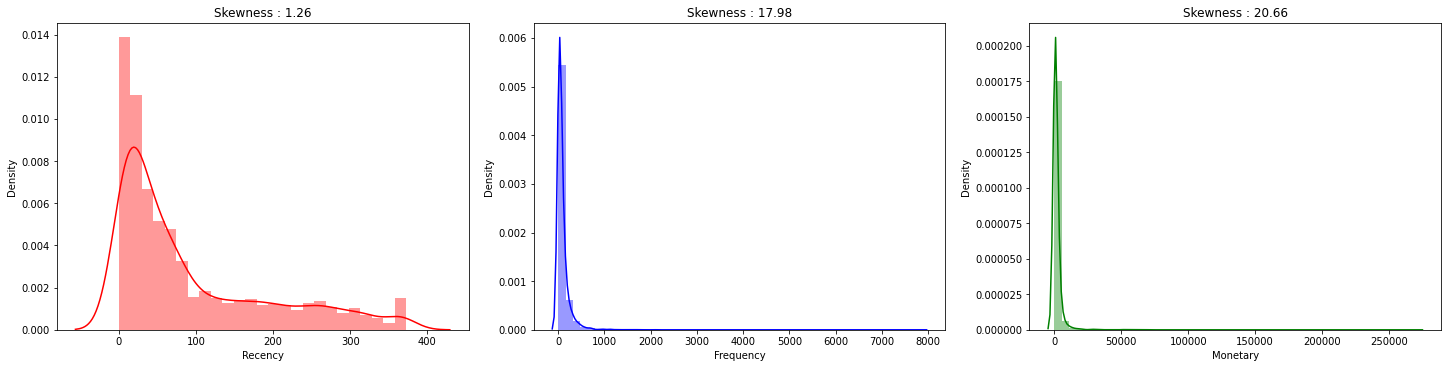

In [20]:
#Trực quan phân phối Recency, Frequency and Monetary.
i = 0
fig = plt.figure(constrained_layout = True,figsize = (20,5))
gs = GridSpec(1, 3, figure=fig)    

col = ['red','blue','green']
for var in list(RFM_data.columns[1:4]):
    plt.subplot(gs[0,i])
    sns.distplot(RFM_data[var],color= col[i])
    plt.title('Skewness ' + ': ' + round(RFM_data[var].skew(),2).astype(str))
    i= i+1

In [21]:
quantiles = RFM_data.quantile(q = [0.25,0.5,0.75])
quantiles.to_dict()

{'CustomerID': {0.25: 13810.5, 0.5: 15279.0, 0.75: 16767.5},
 'Frequency': {0.25: 18.0, 0.5: 42.0, 0.75: 102.0},
 'Monetary': {0.25: 308.84000000000003,
  0.5: 674.5199999999999,
  0.75: 1628.6200000000008},
 'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.0}}

In [22]:
def R_score(var,p,d):
    if var <= d[p][0.25]:
        return 1
    elif var <= d[p][0.50]:
        return 2
    elif var <= d[p][0.75]:
        return 3
    else:
        return 4
#[2] Frequency and Monetary (Positive Impact : Higher the value, better the customer)
def FM_score(var,p,d):
    if var <= d[p][0.25]:
        return 4
    elif var <= d[p][0.50]:
        return 3
    elif var <= d[p][0.75]:
        return 2
    else:
        return 1

In [23]:
RFM_data['R_score'] = RFM_data['Recency'].apply(R_score,args = ('Recency',quantiles,))
RFM_data['F_score'] = RFM_data['Frequency'].apply(FM_score,args = ('Frequency',quantiles,))
RFM_data['M_score'] = RFM_data['Monetary'].apply(FM_score,args = ('Monetary',quantiles,))
RFM_data.head()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score
0,12347.0,2,182,4310.00,1,1,1
1,12348.0,75,31,1797.24,3,3,1
2,12349.0,18,73,1757.55,2,2,1
3,12350.0,310,17,334.40,4,4,3
4,12352.0,36,85,2506.04,2,2,1
